In [1]:
import os
import pandas as df

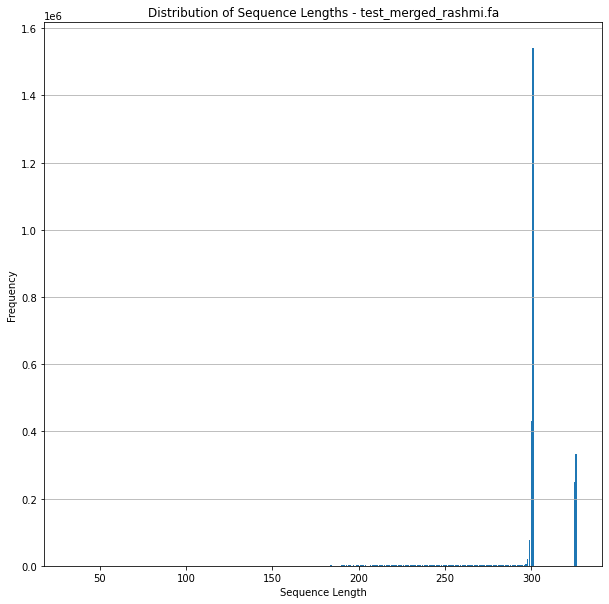

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def read_fasta_file(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('>'):
                sequence_id = line[1:].strip()
                sequences.append({'id': sequence_id, 'sequence': ''})
            else:
                sequences[-1]['sequence'] += line.strip()
    return sequences

def plot_sequence_length_distribution(file_path):
    sequences = read_fasta_file(file_path)

    # Calculate sequence lengths
    for sequence in sequences:
        sequence['length'] = len(sequence['sequence'])

    # Create pandas DataFrame
    df = pd.DataFrame(sequences)

    # Calculate the distribution of sequence lengths
    sequence_lengths_distribution = df['length'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(10, 10))
    plt.bar(sequence_lengths_distribution.index, sequence_lengths_distribution.values)
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sequence Lengths - ' + file_path)
    plt.grid(axis='y')
    plt.show()

# List of FASTA files you want to process
fasta_files = ['test_merged_rashmi.fa']

# Process each file and plot sequence length distribution
for file_path in fasta_files:
    plot_sequence_length_distribution(file_path)
